# load saved episode data and test plotting functions

Load the necessary library

In [1]:
import numpy as np
import os

import pandas as pd

from plot_experiment import plot_episode_data_virtual
from eval_metrics import success_rate_from_distances
import matplotlib.pyplot as plt
import seaborn as sns


In [57]:
load_dir = "../evaluations/icra24/expR/"
experiments = os.listdir(load_dir)
# remove the .png files or .csv files
experiments = [experiment for experiment in experiments if ".png" not in experiment and ".csv" not in experiment]
print(experiments)
# getting all the actions for all the episodes under the @load_dir experiments
all_actions = [pd.read_csv(load_dir + experiment + "/" + ep + "/actions.csv", index_col=None)
                        for experiment in experiments for ep in os.listdir(load_dir + experiment) if ".png" not in ep]

['nominal_GoToXY_MLP_expRew_PE_0.02', 'nominal_GoToXY_MLP_expRew', 'nominal_GoToXY_MLP_expRew_PE_0.03']


In [58]:
print(all_actions[0].shape)

(500, 9)


In [59]:
print(len(all_actions))
for i in range(len(all_actions)):
    all_actions[i].drop(columns=["Unnamed: 0"], inplace=True)

all_actions[0].head()

12


,0,1,2,3,4,5,6,7
0,1,0,0,0,0,1,0,0
1,1,0,0,0,0,1,0,0
2,1,0,0,0,0,1,0,0
3,1,0,0,0,0,1,0,0
4,0,0,0,0,0,1,0,0


In [60]:
# Find the episode where the sum of actions has only zeros (no action) for all the time steps
#all_actions = np.array(all_actions)
broken_episodes = [i for i in range(len(all_actions)) if np.array(all_actions)[i,:].sum() == 0]
# Remove episodes that are broken by the environment (IsaacGym bug)
if broken_episodes:
    print(f'Broken episodes: {broken_episodes}')

Broken episodes: [1, 6, 10]


In [61]:
all_actions[2].shape

(500, 8)

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

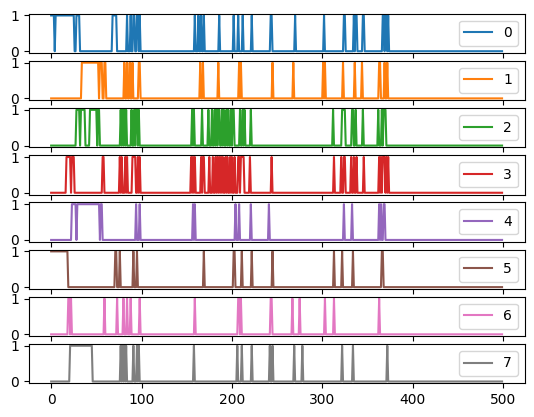

In [62]:

all_actions[0].plot(subplots=True)

<BarContainer object of 8 artists>

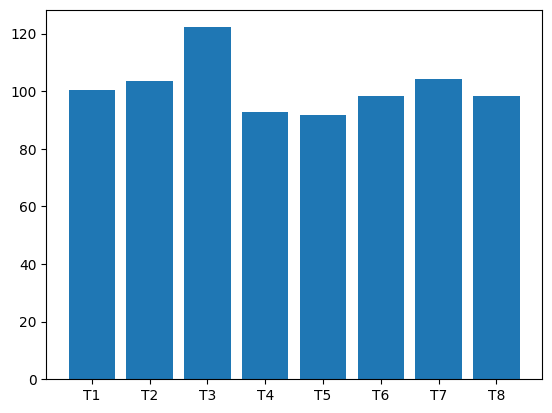

In [63]:
freq = pd.DataFrame(data=np.array([all_actions[i].sum() for i in range(len(all_actions))]), 
                    columns=[f'T{i+1}' for i in range(8)])

mean_freq = freq.mean()
mean_freq.shape
plt.bar(mean_freq.index, mean_freq.values)


<AxesSubplot:>

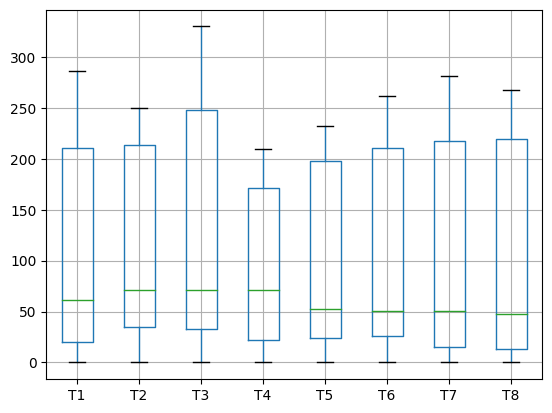

In [64]:
freq.boxplot()

<AxesSubplot:>

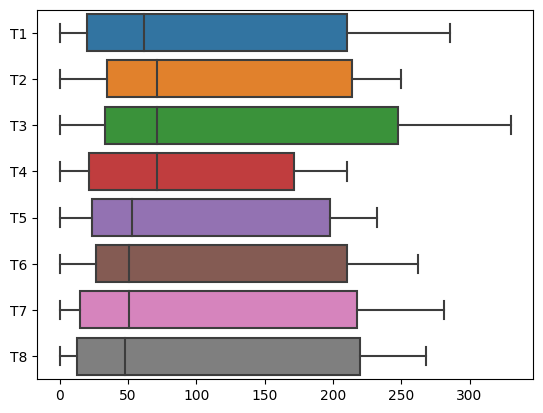

In [65]:
sns.boxplot(data=freq, orient="h")

In [66]:
all_actions[0].describe()

,0,1,2,3,4,5,6,7
count,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.13200,0.092000,0.124000,0.122000,0.092000,0.070000,0.040000,0.086000
std,0.33883,0.289315,0.329912,0.327614,0.289315,0.255403,0.196155,0.280645
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Multi model evaluation

In [67]:
res_multi_linR = pd.read_csv("../evaluations/icra24/linR/multi_model_performance.csv", index_col=[0])
res_multi_linR

,model,success_rate_0.02_m,success_rate_0.01_m,success_and_stay_within_0.15_m,avg_rew,avg_ang_vel,avg_action_count
0,nominal_GoToXY_MLP_linRew_PE_0.04,100.0,100.0,98.804781,0.811186,-4.861981,21.26050
1,nominal_GoToXY_MLP_linRew_PE_0.05,100.0,100.0,99.596774,0.805782,-5.462996,14.65425
2,nominal_GoToXY_MLP_linRew_PE_0.02,100.0,100.0,98.406375,0.807702,-3.255291,35.85025
3,nominal_GoToXY_MLP_linRew_PE_0.03,100.0,100.0,96.734694,0.809927,-5.179172,29.82450
4,nominal_GoToXY_MLP_linRew,100.0,100.0,96.442688,0.798861,-0.933770,137.08200
5,nominal_GoToXY_MLP_linRew_PE_0.01,100.0,100.0,97.254902,0.829999,-3.437077,69.89725


In [68]:
res_multi_expR = pd.read_csv("../evaluations/icra24/expR/multi_model_performance.csv", index_col=[0])
res_multi_expR

,model,success_rate_0.02_m,success_rate_0.01_m,success_and_stay_within_0.15_m,avg_rew,avg_ang_vel,avg_action_count
0,nominal_GoToXY_MLP_expRew_PE_0.02,99.607843,99.215686,85.882353,0.807656,-0.022745,23.37875
1,nominal_GoToXY_MLP_expRew,100.000000,100.000000,97.637795,0.848629,-1.757991,135.83850
2,nominal_GoToXY_MLP_expRew_PE_0.01,99.601594,99.601594,98.007968,0.847832,-4.034950,100.64225
3,nominal_GoToXY_MLP_expRew_PE_0.05,100.000000,100.000000,99.600000,0.852735,-5.098871,30.81850
4,nominal_GoToXY_MLP_expRew_PE_0.03,100.000000,100.000000,96.825397,0.832495,-0.012592,23.33075
5,nominal_GoToXY_MLP_expRew_PE_0.04,100.000000,100.000000,99.596774,0.848175,-2.398536,48.93100


In [69]:
res_multi_expR_UF = pd.read_csv("../evaluations/icra24/expR_UF/multi_model_performance.csv", index_col=[0])
res_multi_expR_UF

,model,success_rate_0.02_m,success_rate_0.01_m,success_and_stay_within_0.15_m,avg_rew,avg_ang_vel,avg_action_count
0,nominal_UF_0.25_GoToXY_MLP_expRew_PE_0.03,100.0,100.0,100.000000,0.868573,-2.421867,54.11275
1,nominal_UF_0.25_GoToXY_MLP_expRew_PE_0.01,100.0,100.0,98.437500,0.856268,-1.220997,91.28450
2,nominal_UF_0.25_GoToXY_MLP_expRew_PE_0.02,100.0,100.0,99.609375,0.875384,-0.001698,69.00325
3,nominal_UF_0.25_GoToXY_MLP_expRew,100.0,100.0,100.000000,0.849794,-4.311330,101.99575
4,nominal_UF_0.25_GoToXY_MLP_expRew_PE_0.04,100.0,100.0,100.000000,0.865813,-4.351103,43.82725
5,nominal_UF_0.25_GoToXY_MLP_expRew_PE_0.05,100.0,100.0,96.456693,0.840660,0.009413,20.00400


In [70]:
res_multi_new_mass = pd.read_csv("../evaluations/new_mass/multi_model_performance.csv", index_col=[0])
res_multi_new_mass

,model,success_rate_0.02_m,success_rate_0.01_m,success_and_stay_within_0.15_m,avg_rew,avg_ang_vel,avg_action_count
0,MLP_GTXY_UF_0.25_ST_PE_0.01_PAV_0.5_PLV_0.05_5kg,100.000000,100.000000,98.015873,0.849471,-2.250901,136.81350
1,MLP_GTXY_UF_0.25_ST_PE_0.05_PAV_1.5_PLV_0.01_5kg,100.000000,100.000000,98.031496,0.844257,-2.298851,137.74300
2,MLP_GTXY_UF_0.25_ST_PE_0.025_PAV_0.5_PLV_0.025...,100.000000,100.000000,99.218750,0.846306,-2.259960,138.54775
3,MLP_GTXY_UF_0.25_ST_PE_0.025_PAV_1.0_PLV_0.025...,100.000000,100.000000,97.656250,0.846964,-2.265940,138.71400
4,MLP_GTXY_UF_0.25_ST_PE_0.05_PAV_0.5_PLV_0.01_5kg,100.000000,100.000000,95.686275,0.846280,-2.298928,137.90700
5,MLP_GTXY_UF_0.25_ST_PE_0.05_PAV_1.0_PLV_0.01_5kg,100.000000,100.000000,98.039216,0.846008,-2.240409,138.64475
6,MLP_GTXY_UF_0.25_ST_PE_0.01_PAV_1.0_PLV_0.05_5kg,100.000000,100.000000,99.604743,0.844463,-2.278868,137.14525
7,MLP_GTXY_UF_0.25_ST_PE_0.01_PAV_1.5_PLV_0.01_5kg,100.000000,100.000000,98.023715,0.846573,-2.297946,137.34125
8,MLP_GTXY_UF_0.25_ST_PE_0.03_PAV_1.5_PLV_0.01_5kg,100.000000,100.000000,98.000000,0.845570,-2.272622,135.45175
9,MLP_GTXY_UF_0.5_ST_PE_0.01_PAV_0.5_PLV_0.01_5kg,100.000000,100.000000,100.000000,0.830302,-6.525306,109.06000


<AxesSubplot:>

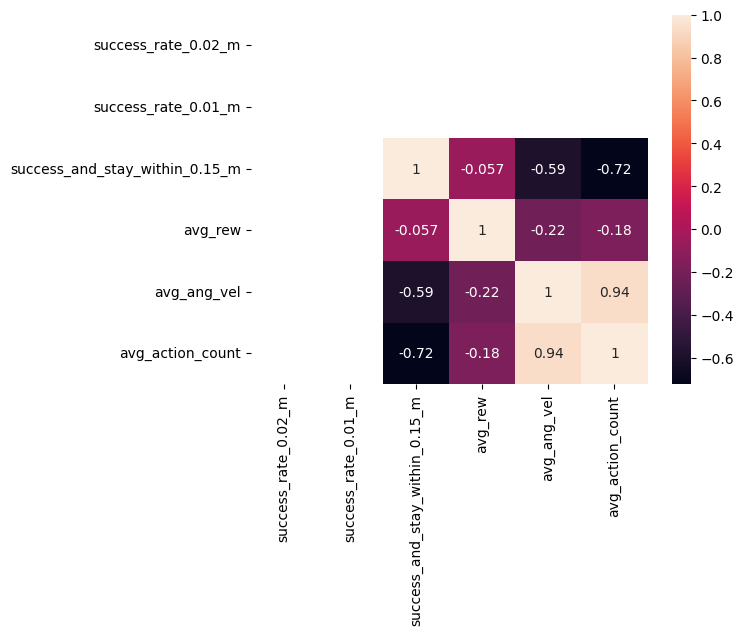

In [71]:
sns.heatmap(res_multi_linR.corr(), annot=True)

<AxesSubplot:>

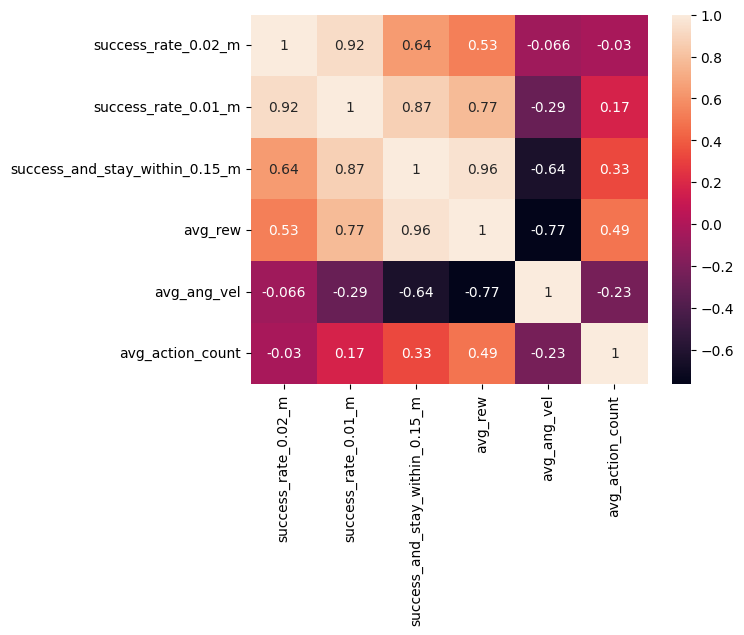

In [72]:
sns.heatmap(res_multi_expR.corr(), annot=True)

<AxesSubplot:>

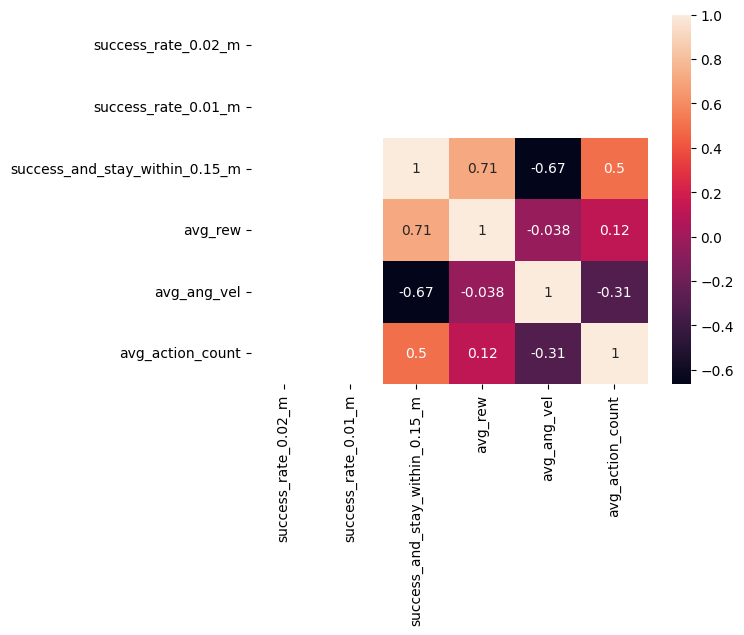

In [73]:
sns.heatmap(res_multi_expR_UF.corr(), annot=True)

<AxesSubplot:>

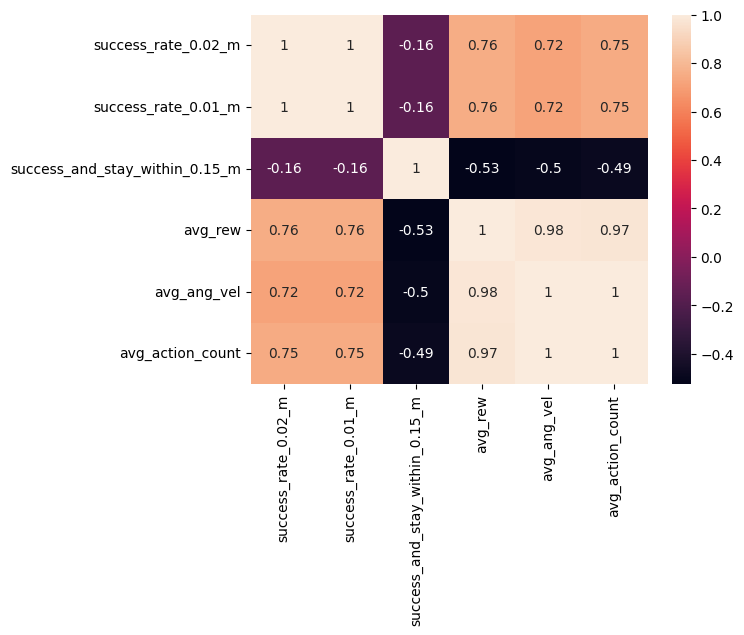

In [74]:
sns.heatmap(res_multi_new_mass.corr(), annot=True)

In [19]:
res_multi_gotoPose = pd.read_csv("../evaluations/icra24_Pose/multi_model_performance.csv", index_col=[0])
res_multi_gotoPose_BB = pd.read_csv("../evaluations/icra24_Pose/multi_model_performance_BB.csv", index_col=[0])

In [20]:
res_multi_gotoPose = pd.concat([res_multi_gotoPose, res_multi_gotoPose_BB])
res_multi_gotoPose

,model,success_rate_0.05_m,success_rate_0.025_m,success_and_stay_within_0.375_m,avg_rew,avg_ang_vel,avg_action_count
0,nominal_UF_0.25_GoToPose_MLP_expRew_PE_0.05,66.400000,40.400000,12.000000,0.239495,0.030367,53.93325
1,nominal_UF_0.25_GoToPose_MLP_expRew_PE_0.03,10.156250,6.640625,3.515625,0.183085,-0.005757,73.24775
2,nominal_UF_0.25_GoToPose_MLP_expRew_PE_0.01,37.301587,20.634921,3.571429,0.158461,0.006514,56.36675
3,nominal_UF_0.25_GoToPose_MLP_expRew,3.984064,1.195219,0.000000,0.093639,-0.054786,53.03250
4,nominal_UF_0.25_GoToPose_MLP_expRew_PE_0.04,89.370079,76.771654,56.692913,0.403680,-0.038970,92.37325
5,nominal_UF_0.25_GoToPose_MLP_expRew_PE_0.02,51.250000,25.416667,36.666667,0.365734,0.014265,32.22175
0,nominal_UF_0.25_GoToPose_BB_MLP_expRew_PE_0.05,33.185841,11.946903,1.769912,0.235815,-0.036644,20.34200
1,nominal_UF_0.25_GoToPose_BB_MLP_expRew_PE_0.02,21.097046,8.860759,2.109705,0.198171,-0.018613,56.66300
2,nominal_UF_0.25_GoToPose_BB_MLP_expRew_PE_0.03,87.866109,72.384937,20.920502,0.269392,-0.043511,37.04475
3,nominal_UF_0.25_GoToPose_BB_MLP_expRew_PE_0.01,19.421488,9.090909,0.826446,0.069799,-0.019112,35.71650


In [21]:
#res_multi_gotoPose.to_csv("../evaluations/icra24_Pose/multi_model_performance_thr_0.1.csv")

<AxesSubplot:>

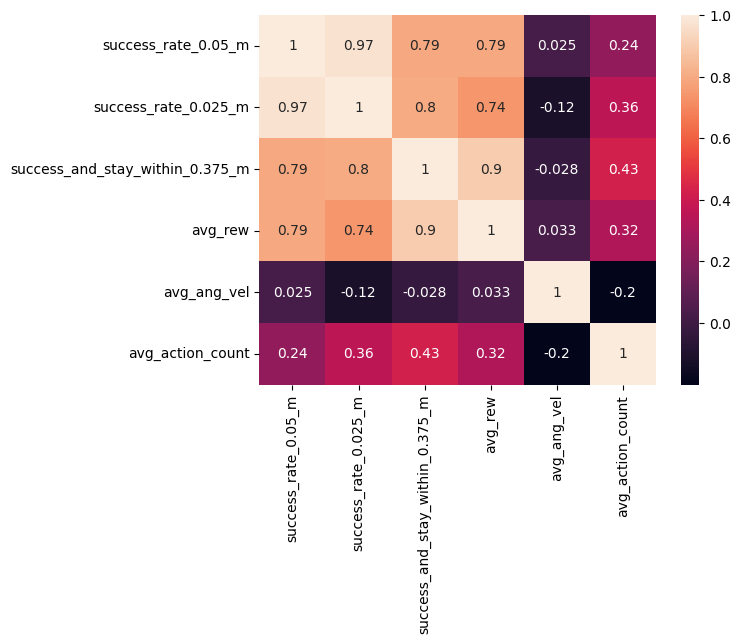

In [22]:
sns.heatmap(res_multi_gotoPose.corr(), annot=True)